In [1]:
import time
import numpy as np
from sklearn import metrics
import pycaret
from pycaret.datasets import get_data
from pycaret.internal.PycaretExperiment import TimeSeriesExperiment

from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe1aa2d2f90>)

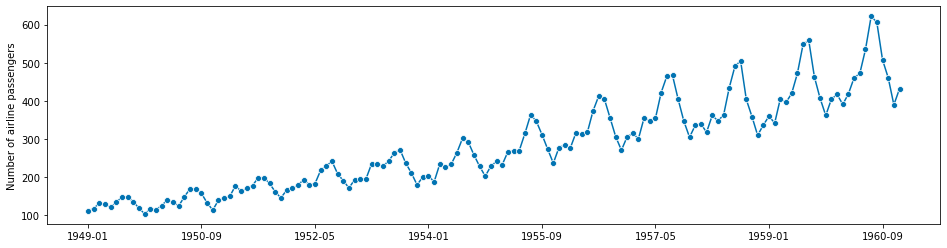

In [2]:
y = get_data('airline', verbose=False)
plot_series(y)

In [3]:
fh = np.arange(1,13)
fold = 3

In [4]:
# Available Models
exp = TimeSeriesExperiment()
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive,sktime.forecasting.naive.NaiveForecaster,True
poly_trend,PolyTrend,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
exp_smooth,ExponentialSmoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
auto_ets,AutoETS,sktime.forecasting.ets.AutoETS,True
theta,Theta,sktime.forecasting.theta.ThetaForecaster,True
rf_dts,RandomForestDTS,pycaret.containers.models.time_series.RandomFo...,True
ensemble_forecaster,EnsembleForecaster,pycaret.internal.ensemble._EnsembleForecasterW...,True


## Sliding Window Splitter

In [5]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='slidingwindow')
arima_model = exp.create_model("arima")

,smape,mape,mae,rmse
0,0.2544,0.2172,86.4672,10986.2059
1,0.1969,0.1705,72.3623,9262.3184
2,0.2978,0.2508,115.1556,18344.7882
Mean,0.2497,0.2128,91.3284,12864.4375
SD,0.0413,0.0329,17.8053,3938.5809


In [6]:
# Internally split Keep len(fh) as test set
arima_model.predict()

1960-01    399.517880
1960-02    394.245028
1960-03    389.173456
1960-04    384.295479
1960-05    379.603708
1960-06    375.091034
1960-07    370.750622
1960-08    366.575896
1960-09    362.560530
1960-10    358.698442
1960-11    354.983780
1960-12    351.410917
Freq: M, dtype: float64

## Expanding Window Splitter

In [7]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')
arima_model = exp.create_model("arima")

,smape,mape,mae,rmse
0,0.2544,0.2172,86.4672,10986.2059
1,0.1931,0.1675,71.1742,9049.5815
2,0.2962,0.2496,114.6292,18211.8563
Mean,0.2479,0.2114,90.7569,12749.2146
SD,0.0424,0.0338,17.9979,3942.7545


In [8]:
arima_model.predict()

1960-01    399.517880
1960-02    394.245028
1960-03    389.173456
1960-04    384.295479
1960-05    379.603708
1960-06    375.091034
1960-07    370.750622
1960-08    366.575896
1960-09    362.560530
1960-10    358.698442
1960-11    354.983780
1960-12    351.410917
Freq: M, dtype: float64

## Error Handling

In [9]:
try:
    exp = TimeSeriesExperiment()
    exp.setup(data=y, fh=17, fold=76, fold_strategy='expandingwindow')
except ValueError as error:
    print(error)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:50:44
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,PolyTrend


Not Enough Data Points, set a lower number of folds or fh


# Model types

## Common Setup

In [10]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow', session_id=42)

,Description,Value
0,session_id,42
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


## Naive

In [11]:
naive_model = exp.create_model("naive")
naive_model.predict()

,smape,mape,mae,rmse
0,0.1766,0.1549,63.4167,6967.9167
1,0.1351,0.1205,52.3333,5842.1667
2,0.2259,0.1954,91.3333,12811.6667
Mean,0.1792,0.1569,69.0278,8540.5833
SD,0.0371,0.0306,16.4086,3054.8806


1960-01    405.0
1960-02    405.0
1960-03    405.0
1960-04    405.0
1960-05    405.0
1960-06    405.0
1960-07    405.0
1960-08    405.0
1960-09    405.0
1960-10    405.0
1960-11    405.0
1960-12    405.0
Freq: M, dtype: float64

In [12]:
# Fixed Grid Search
tuned_naive = exp.tune_model(naive_model)
print(naive_model)
print(tuned_naive)

,smape,mape,mae,rmse
0,0.1138,0.1076,40.1667,1720.1667
1,0.0322,0.0314,12.5833,289.4167
2,0.1176,0.1106,47.3333,2426.0000
Mean,0.0879,0.0832,33.3611,1478.5278
SD,0.0394,0.0367,14.9806,888.8341


NaiveForecaster(sp=1, strategy='last', window_length=None)
NaiveForecaster(sp=12, strategy='last', window_length=None)


In [13]:
# Random Grid Search
tuned_naive = exp.tune_model(naive_model, search_algorithm="random")
print(naive_model)
print(tuned_naive)

,smape,mape,mae,rmse
0,0.1138,0.1076,40.1667,1720.1667
1,0.0322,0.0314,12.5833,289.4167
2,0.1176,0.1106,47.3333,2426.0000
Mean,0.0879,0.0832,33.3611,1478.5278
SD,0.0394,0.0367,14.9806,888.8341


NaiveForecaster(sp=1, strategy='last', window_length=None)
NaiveForecaster(sp=12, strategy='last', window_length=None)


## Polynomial Trend

In [14]:
poly_model = exp.create_model("poly_trend")
poly_model.predict()

,smape,mape,mae,rmse
0,0.1226,0.1140,45.8148,3789.0261
1,0.1278,0.1275,49.9929,3759.3858
2,0.1144,0.1096,50.0825,4545.5664
Mean,0.1216,0.1170,48.6301,4031.3261
SD,0.0055,0.0076,1.9910,363.8241


1960-01    432.979412
1960-02    435.543127
1960-03    438.106841
1960-04    440.670555
1960-05    443.234269
1960-06    445.797983
1960-07    448.361697
1960-08    450.925411
1960-09    453.489125
1960-10    456.052839
1960-11    458.616554
1960-12    461.180268
Freq: M, dtype: float64

In [15]:
# Fixed Grid Search
tuned_poly = exp.tune_model(poly_model)
print(poly_model)
print(tuned_poly)

,smape,mape,mae,rmse
0,0.1226,0.1140,45.8148,3789.0261
1,0.1278,0.1275,49.9929,3759.3858
2,0.1144,0.1096,50.0825,4545.5664
Mean,0.1216,0.1170,48.6301,4031.3261
SD,0.0055,0.0076,1.9910,363.8241


PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)
PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)


In [16]:
# Random Grid Search
tuned_poly = exp.tune_model(poly_model, search_algorithm="random")
print(poly_model)
print(tuned_poly)

,smape,mape,mae,rmse
0,0.1215,0.1232,45.6407,3009.1181
1,0.1651,0.1792,65.0246,5126.1853
2,0.1146,0.1110,50.1574,4417.8619
Mean,0.1337,0.1378,53.6076,4184.3884
SD,0.0223,0.0297,8.2810,879.9150


PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)
PolynomialTrendForecaster(degree=3, regressor=None, with_intercept=True)


## ARIMA

In [17]:
naive_model = exp.create_model("arima")
naive_model.predict()

,smape,mape,mae,rmse
0,0.2544,0.2172,86.4672,10986.2059
1,0.1931,0.1675,71.1742,9049.5815
2,0.2962,0.2496,114.6292,18211.8563
Mean,0.2479,0.2114,90.7569,12749.2146
SD,0.0424,0.0338,17.9979,3942.7545


1960-01    399.517880
1960-02    394.245028
1960-03    389.173456
1960-04    384.295479
1960-05    379.603708
1960-06    375.091034
1960-07    370.750622
1960-08    366.575896
1960-09    362.560530
1960-10    358.698442
1960-11    354.983780
1960-12    351.410917
Freq: M, dtype: float64

In [18]:
# Fixed Grid Search
tuned_arima = exp.tune_model(arima_model)
print(arima_model)
print(tuned_arima)

,smape,mape,mae,rmse
0,0.2767,0.2401,91.6004,9823.6668
1,0.1797,0.1623,65.5746,5777.2750
2,0.3155,0.2685,118.6964,16425.3251
Mean,0.2573,0.2236,91.9571,10675.4223
SD,0.0571,0.0449,21.6883,4388.5729


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 1, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)


In [19]:
# Random Grid Search
tuned_arima = exp.tune_model(arima_model, search_algorithm="random")
print(arima_model)
print(tuned_arima)

,smape,mape,mae,rmse
0,0.0339,0.0331,13.2626,277.8525
1,0.0513,0.0530,19.1686,455.3259
2,0.0506,0.0491,21.1925,551.0621
Mean,0.0453,0.0451,17.8746,428.0802
SD,0.0080,0.0086,3.3642,113.1890


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 1, 0, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)


## Exponential Smoothing

In [20]:
exp_model = exp.create_model("exp_smooth")
exp_model.predict()

,smape,mape,mae,rmse
0,0.1766,0.1549,63.4167,6967.9167
1,0.1351,0.1205,52.3333,5842.1667
2,0.2263,0.1957,91.4671,12836.1198
Mean,0.1793,0.1570,69.0724,8548.7344
SD,0.0373,0.0307,16.4692,3066.2771


1960-01    404.786132
1960-02    404.786132
1960-03    404.786132
1960-04    404.786132
1960-05    404.786132
1960-06    404.786132
1960-07    404.786132
1960-08    404.786132
1960-09    404.786132
1960-10    404.786132
1960-11    404.786132
1960-12    404.786132
Freq: M, dtype: float64

In [21]:
# Fixed Grid Search
tuned_expo = exp.tune_model(exp_model)
print(exp_model)
print(tuned_expo)

,smape,mape,mae,rmse
0,0.0273,0.0272,10.5620,182.1899
1,0.0704,0.0738,26.2573,903.9160
2,0.0265,0.0261,11.2644,179.8603
Mean,0.0414,0.0424,16.0279,421.9887
SD,0.0205,0.0222,7.2390,340.7754


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal=None, sp=None,
                     trend=None, use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=True)


In [22]:
# Random Grid Search
tuned_expo = exp.tune_model(exp_model, search_algorithm="random")
print(exp_model)
print(tuned_expo)

,smape,mape,mae,rmse
0,0.0273,0.0272,10.5620,182.1899
1,0.0704,0.0738,26.2573,903.9160
2,0.0265,0.0261,11.2644,179.8603
Mean,0.0414,0.0424,16.0279,421.9887
SD,0.0205,0.0222,7.2390,340.7754


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal=None, sp=None,
                     trend=None, use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='additive',
                     sp=None, trend='additive', use_boxcox=True)


## Theta Model

In [23]:
theta_model = exp.create_model("theta")
theta_model.predict()

,smape,mape,mae,rmse
0,0.1582,0.1406,57.5799,5883.9192
1,0.1244,0.1131,48.6352,5040.6939
2,0.1995,0.1738,82.1049,11072.6778
Mean,0.1607,0.1425,62.7733,7332.4303
SD,0.0307,0.0248,14.1488,2667.0640


1960-01    407.356288
1960-02    408.638145
1960-03    409.920002
1960-04    411.201859
1960-05    412.483716
1960-06    413.765573
1960-07    415.047430
1960-08    416.329287
1960-09    417.611144
1960-10    418.893001
1960-11    420.174858
1960-12    421.456715
Freq: M, dtype: float64

In [24]:
# Fixed Grid Search
tuned_theta = exp.tune_model(theta_model)
print(theta_model)
print(tuned_theta)

,smape,mape,mae,rmse
0,0.0592,0.0570,22.3655,776.5132
1,0.0378,0.0378,15.0918,398.2215
2,0.0884,0.0832,37.8295,2153.9634
Mean,0.0618,0.0593,25.0956,1109.5660
SD,0.0207,0.0186,9.4813,754.4758


ThetaForecaster(deseasonalize=True, initial_level=None, sp=1)
ThetaForecaster(deseasonalize=True, initial_level=None, sp=24)


In [25]:
# Random Grid Search
tuned_theta = exp.tune_model(theta_model, search_algorithm="random")
print(theta_model)
print(tuned_theta)

,smape,mape,mae,rmse
0,0.0592,0.0570,22.3655,776.5132
1,0.0378,0.0378,15.0918,398.2215
2,0.0884,0.0832,37.8295,2153.9634
Mean,0.0618,0.0593,25.0956,1109.5660
SD,0.0207,0.0186,9.4813,754.4758


ThetaForecaster(deseasonalize=True, initial_level=None, sp=1)
ThetaForecaster(deseasonalize=True, initial_level=None, sp=24)


## AutoETS

In [26]:
auto_ets_model = exp.create_model("auto_ets")
auto_ets_model.predict()

,smape,mape,mae,rmse
0,0.1766,0.1549,63.4190,6968.3536
1,0.1351,0.1205,52.3354,5842.4456
2,0.2259,0.1954,91.3360,12812.1598
Mean,0.1792,0.1569,69.0301,8540.9863
SD,0.0371,0.0306,16.4089,3054.9533


1960-01    404.9957
1960-02    404.9957
1960-03    404.9957
1960-04    404.9957
1960-05    404.9957
1960-06    404.9957
1960-07    404.9957
1960-08    404.9957
1960-09    404.9957
1960-10    404.9957
1960-11    404.9957
1960-12    404.9957
Freq: M, dtype: float64

In [27]:
# Fixed Grid Search
tuned_auto_ets = exp.tune_model(auto_ets_model)
print(auto_ets_model)
print(tuned_auto_ets)

,smape,mape,mae,rmse
0,0.0376,0.0366,14.5615,352.4886
1,0.0446,0.0458,16.7827,372.8826
2,0.0512,0.0495,20.8904,549.0250
Mean,0.0445,0.0440,17.4115,424.7988
SD,0.0055,0.0054,2.6218,88.2349


AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal=None, sp=1,
        start_params=None, trend=None)
AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='mul', sp=12,
        start_params=None, trend='add')


In [28]:
# Random Grid Search
tuned_auto_ets = exp.tune_model(auto_ets_model, search_algorithm="random")
print(auto_ets_model)
print(tuned_auto_ets)

,smape,mape,mae,rmse
0,0.0376,0.0366,14.5615,352.4886
1,0.0446,0.0458,16.7827,372.8826
2,0.0512,0.0495,20.8904,549.0250
Mean,0.0445,0.0440,17.4115,424.7988
SD,0.0055,0.0054,2.6218,88.2349


AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal=None, sp=1,
        start_params=None, trend=None)
AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='mul', sp=12,
        start_params=None, trend='add')


## Random Forest (with internal deseasonalize and detrending)

In [29]:
rf_dts_model = exp.create_model("rf_dts")
rf_dts_model.predict()

,smape,mape,mae,rmse
0,0.0836,0.0780,32.2003,2045.6715
1,0.0701,0.0694,27.8217,1179.8993
2,0.0647,0.0613,29.5276,1811.2837
Mean,0.0728,0.0696,29.8499,1678.9515
SD,0.0079,0.0068,1.8020,365.6266


1960-01    402.724633
1960-02    395.194112
1960-03    437.555321
1960-04    434.519637
1960-05    445.293321
1960-06    492.806832
1960-07    498.838305
1960-08    531.441731
1960-09    493.814870
1960-10    436.655985
1960-11    401.906199
1960-12    426.405317
Freq: M, dtype: float64

In [30]:
# Fixed Grid Search
tuned_rf_dts = exp.tune_model(rf_dts_model)
print(rf_dts_model)
print(tuned_rf_dts)

,smape,mape,mae,rmse
0,0.0720,0.0676,28.0965,1602.5270
1,0.0567,0.0570,22.1763,783.4473
2,0.0370,0.0358,17.2058,762.0319
Mean,0.0553,0.0535,22.4929,1049.3354
SD,0.0143,0.0132,4.4517,391.2632


RandomForestDTS(degree=1, model='additive', sp=1, window_length=10)
RandomForestDTS(degree=1, model='additive', sp=12, window_length=10)


In [31]:
# Random Grid Search
tuned_rf_dts = exp.tune_model(rf_dts_model, search_algorithm="random")
print(rf_dts_model)
print(tuned_rf_dts)

,smape,mape,mae,rmse
0,0.0706,0.0666,27.5114,1448.7132
1,0.0644,0.0622,26.2056,1439.5357
2,0.0424,0.0409,19.6544,936.0682
Mean,0.0591,0.0566,24.4571,1274.7724
SD,0.0121,0.0112,3.4376,239.5293


RandomForestDTS(degree=1, model='additive', sp=1, window_length=10)
RandomForestDTS(degree=1, model='additive', sp=12, window_length=10)


## Tune Models

Shown above

## Blend Models

In [32]:
arima_model = exp.create_model("arima")
naive_model = exp.create_model("naive")

,smape,mape,mae,rmse
0,0.1766,0.1549,63.4167,6967.9167
1,0.1351,0.1205,52.3333,5842.1667
2,0.2259,0.1954,91.3333,12811.6667
Mean,0.1792,0.1569,69.0278,8540.5833
SD,0.0371,0.0306,16.4086,3054.8806


In [33]:
mean_blender = exp.blend_models([arima_model, naive_model], method='mean')

,smape,mape,mae,rmse
0,0.2133,0.1848,74.5645,8799.7367
1,0.1599,0.1404,60.6337,7259.3400
2,0.2604,0.2225,102.9813,15344.8780
Mean,0.2112,0.1826,79.3932,10467.9849
SD,0.0411,0.0336,17.6223,3505.3550


In [34]:
median_blender = exp.blend_models([arima_model, naive_model], method='median')

,smape,mape,mae,rmse
0,0.2133,0.1848,74.5645,8799.7367
1,0.1599,0.1404,60.6337,7259.3400
2,0.2604,0.2225,102.9813,15344.8780
Mean,0.2112,0.1826,79.3932,10467.9849
SD,0.0411,0.0336,17.6223,3505.3550


In [35]:
voting_blender = exp.blend_models([arima_model, naive_model], method='voting', weights=[1.2, 0.7])

,smape,mape,mae,rmse
0,0.2236,0.1930,77.6065,9340.7390
1,0.1666,0.1456,62.8180,7694.2862
2,0.2697,0.2296,106.0465,16066.9863
Mean,0.2200,0.1894,82.1570,11034.0038
SD,0.0422,0.0344,17.9389,3621.7755


## Compare Models

In [36]:
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='slidingwindow')

best_models = exp.compare_models(fold=fold, sort='rmse', n_select=2)
best_models

,Model,smape,mape,mae,rmse,TT (Sec)
rf_dts,RandomForestDTS,0.0744,0.0723,29.7546,1533.3301,0.1467
poly_trend,PolyTrend,0.1235,0.1202,49.3594,3970.8719,0.0133
theta,Theta,0.1600,0.1419,62.5320,7287.7015,0.0133
naive,Naive,0.1792,0.1569,69.0278,8540.5833,0.0100
auto_ets,AutoETS,0.1792,0.1569,69.0301,8540.9863,0.0167
exp_smooth,ExponentialSmoothing,0.1794,0.1571,69.1088,8553.6666,0.0167
arima,ARIMA,0.2497,0.2128,91.3284,12864.4375,0.0433


[RandomForestDTS(degree=1, model='additive', sp=1, window_length=10),
 PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)]

In [37]:
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')

best_models = exp.compare_models(fold=fold, sort='rmse', n_select=2)
best_models

,Model,smape,mape,mae,rmse,TT (Sec)
rf_dts,RandomForestDTS,0.0652,0.0629,26.5238,1287.9684,0.1600
poly_trend,PolyTrend,0.1216,0.1170,48.6301,4031.3261,0.0100
theta,Theta,0.1607,0.1425,62.7733,7332.4303,0.0100
naive,Naive,0.1792,0.1569,69.0278,8540.5833,0.0067
auto_ets,AutoETS,0.1792,0.1569,69.0301,8540.9863,0.0100
exp_smooth,ExponentialSmoothing,0.1793,0.1570,69.0724,8548.7344,0.0100
arima,ARIMA,0.2479,0.2114,90.7569,12749.2146,0.0367


[RandomForestDTS(degree=1, model='additive', sp=1, window_length=10),
 PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)]